# Stationary Transformation

## why stationary transformation matters

A great explaination of time series analysis and the importance of stationary data can be found [here](https://chih-ling-hsu.github.io/2017/03/20/time-series).<br>
In summary, in order for our time series forecasting to be effective, our data has to be stationary. In order to be stationary: 
1. The mean of the series should be a constant of 0
2. The variance should be the same over time
3. The covariance should be the same over time

[see this picture as an example](https://i.imgur.com/3lKCxEn.png)

# ways to make stationary

1. log()

Taking the log of data ia a good way to convert data with an exponential distribution into a <br>
linear distribution and it also helps to stabilize the variance over time. Vector autoregression <br>
is a linear model and taking the log enables us to describe an exponential distribution in linear terms.
         
2. differencing

Taking the difference of consecutive data points is another way to make data stationary. DIfferencing<br>
helps to stabilize the mean of a time series by removing changes to the level of a time series, thus <br>
reducing seasonality and trends.
        
3. log & differencing

Taking the log of data and then differencing is the same thing as log returns, or difference in log over<br>
a time period. Log returns are an industry standard in finance for good reason. Log returns are similar <br>
to scaled percent returns but there are some important differences. Log returns are additive while scaled<br> 
percent returns are not. In other words, the five-day log return is equal to the sum of five one-day log <br>
returns.In addition, log returns are symmetrical with respect to gains and losses, where scaled percent <br>
returns are biased in favor of gains. For example, if a stock goes down 50%(-0.5 scaled percent) and then<br>
goes up 200% (2.0 scaled percent), the stock is back where it started. If the same situation happened in <br>
log, we would first see a log return of log(0.5) = -0.301 followed by log(2) = 0.301.

In [5]:
# import packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [6]:
# import data
df = pd.read_csv('formatted_data_all.csv', index_col = 0)
df.tail()

,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
date,,,,,,,
2018-08-27,7091.379883,0.036595,487789642,68786.279969,850.0,204.0,587.0
2018-08-28,7052.000000,0.027327,356139022,50501.846568,972.0,205.0,590.0
2018-08-29,6998.759766,0.036285,425475685,60793.011794,955.0,227.0,664.0
2018-08-30,7026.959961,0.027558,349131152,49684.522744,886.0,181.0,617.0
2018-08-31,7203.459961,0.034213,300301833,41688.554476,877.0,204.0,599.0


In [7]:
# do both of these to make stationary transformation step easier
# cant have any values nan, inf or 0 for tests to work
# fill na
df = df.fillna(1)
# fill value '0' with '1'
df = df.replace(0, 1)
df.head()

,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
date,,,,,,,
2010-07-16,0.04951,1.000000,1,1.000000,1.0,1.0,1.0
2010-07-17,0.08584,0.308015,5,58.247903,1.0,1.0,1.0
2010-07-18,0.08080,0.196040,49,606.435644,1.0,1.0,1.0
2010-07-19,0.07474,0.101017,20,267.594327,1.0,1.0,1.0
2010-07-20,0.07921,0.162479,42,530.236081,1.0,1.0,1.0


## exploratory functions

In [8]:
# descriptive statistics
def descriptive_statistics(df, series):
    stats = df[series].describe()    
    print('\nDescriptive Statistics for', '\'' + series + '\'', '\n\n', stats)

In [9]:
# create graphics function
def get_graphics(df, series, xlabel, ylabel, title, grid = True):
    plt.plot(pd.to_datetime(df.index), df[series])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)
    return plt.show()

## stationary tests

unit root = statistical properties of series are not constant with time.

In order to be stationary, series has to be constant with time. So if a series has a unit root, it is not stationary

- strict stationary = mean, variance, covariance are not function of time
- trend stationary = no root unit, but has a trend. if you remove the trend, it would be strict stationary
- difference stationary = series can be made strict stationary by differencing

## ADF Augmented Dickey Fuller Test (unit root test)

null hypothesis = series has a unit root (a = 1)<br>
alt hypothesis = series has no unit root

accept null = t-score is greter than critical value (there is a unit root)<br>
reject null = t-score is less than critical value (there is no unit root)

accpet null = bad (not stationary)<br>
reject null = good (stationary)

adf can be interpreted as a difference stationary test

In [10]:
# ADF Augmented Dickey Fuller Test
def adf_test(df, series):
    results = adfuller(df[series])
    output = pd.Series(results[0:4], index = ['t-score', 'p-value', '# of lags used', '# of observations'])
    for key, value in results[4].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nADF: There is something wrong with', '\'' + series + '\'','\n\n', output)

## KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)

null hypothesis = the series has a stationary trend<br>
alt hypothesis = the series has a unit root (series is not stationary)

accept null = t-score is less than critical value (series is stationary) <br>
reject null = t-score is greater than the critical value (series is not stationary)

accpet null = good (stationary)<br>
reject null = bad (not stationary)

kpss classifies a series as stationary on the absence of a unit root<br>
(both strict stationary and trend stationary will be classified as stationary)

In [11]:
# KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)
def kpss_test(df, series):
    results = kpss(df[series], regression = 'ct')
    output = pd.Series(results[0:3], index = ['t-score', 'p-value', '# lags used'])              
    for key, value in results[3].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nKPSS: There is something wrong with', '\'' + series + '\'', '\n\n', output)

Many times, adf and kpss can give conflicting results. if so:

1. [adf = stationary], [kpss = stationary] = series is stationary
2. [adf = stationary], [kpss = NOT stationary] = series is difference stationary. use differencing to make it stationary
3. [adf = NOT stationary], [kpss = stationary] = series is trend stationary. remove trend to make strict stationary
4. [adf = NOT STATIONARY], [kpss = NOT STATIONARY] = series is not stationary

## everything combined

In [12]:
# all functions above in one
def series_analysis(df, series, xlabel, ylabel, title, grid = True):
    # descriptive stats
    descriptive_statistics(df, series)
    # graphics
    get_graphics(df, series, xlabel, ylabel, title, grid = True)
    # stationary tests
    adf_test(df, series)
    kpss_test(df, series)

# transforming variables

In [13]:
# create new df for stationary data
stationary = pd.DataFrame()

- ## price


Descriptive Statistics for 'price' 

 count     2969.000000
mean      1385.907283
std       2913.696062
min          0.049510
25%         11.510000
50%        282.690002
75%        705.400024
max      19345.490234
Name: price, dtype: float64


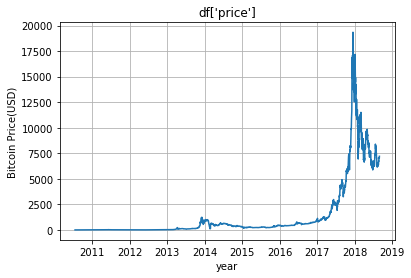


ADF: The data 'price' is NOT STATIONARY 

 t-score                   -1.274978
p-value                    0.640541
# of lags used            29.000000
# of observations       2939.000000
critical value (1%)       -3.432577
critical value (5%)       -2.862524
critical value (10%)      -2.567294
dtype: float64

KPSS: The data 'price' is NOT STATIONARY 

 t-score                   1.198092
p-value                   0.010000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [14]:
# ['price'] 
series_analysis(df, 'price', xlabel = 'year', ylabel = 'Bitcoin Price(USD)', title = 'df[\'price\']')


Descriptive Statistics for 'price' 

 count    2968.000000
mean        0.004005
std         0.069389
min        -0.848765
25%        -0.013854
50%         0.001964
75%         0.022700
max         1.474395
Name: price, dtype: float64


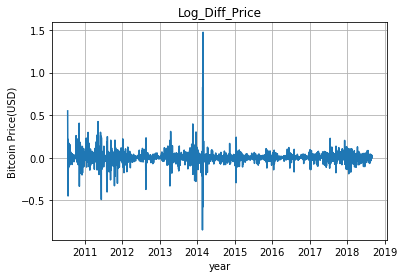


ADF: The data 'price' is STATIONARY 

 t-score                  -21.609835
p-value                    0.000000
# of lags used             4.000000
# of observations       2963.000000
critical value (1%)       -3.432559
critical value (5%)       -2.862516
critical value (10%)      -2.567290
dtype: float64

KPSS: The data 'price' is STATIONARY 

 t-score                   0.085872
p-value                   0.100000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


,price
date,
2010-07-17,0.550310
2010-07-18,-0.060508
2010-07-19,-0.077962
2010-07-20,0.058087
2010-07-21,-0.450129


In [15]:
# ['price'] = log & diff
stationary['price'] = df['price'].apply(np.log).diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'price', xlabel = 'year', ylabel = 'Bitcoin Price(USD)', title = 'Log_Diff_Price')

stationary.head()

- ## volatility


Descriptive Statistics for 'volatility' 

 count    2969.000000
mean        0.078825
std         0.111311
min         0.000310
25%         0.027287
50%         0.047210
75%         0.088750
max         1.839006
Name: volatility, dtype: float64


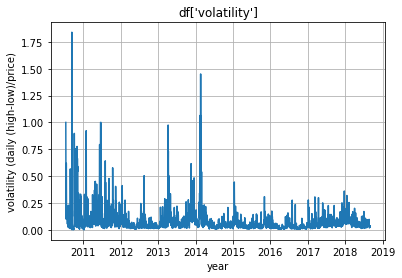


ADF: The data 'volatility' is STATIONARY 

 t-score                -8.578456e+00
p-value                 7.845888e-14
# of lags used          1.500000e+01
# of observations       2.953000e+03
critical value (1%)    -3.432566e+00
critical value (5%)    -2.862519e+00
critical value (10%)   -2.567291e+00
dtype: float64

KPSS: The data 'volatility' is NOT STATIONARY 

 t-score                   0.278201
p-value                   0.010000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [16]:
# ['volatility']
series_analysis(df, 'volatility', xlabel = 'year', ylabel = 'volatility (daily (high-low)/price)', title = 'df[\'volatility\']')


Descriptive Statistics for 'volatility' 

 count    2968.000000
mean       -0.000325
std         0.100633
min        -1.804238
25%        -0.021514
50%        -0.002326
75%         0.016968
max         1.785943
Name: volatility, dtype: float64


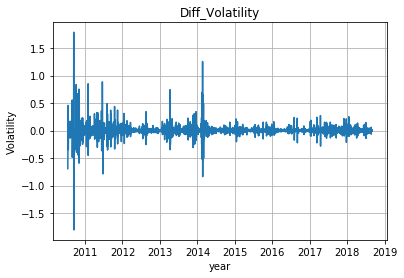


ADF: The data 'volatility' is STATIONARY 

 t-score                -1.535538e+01
p-value                 3.672798e-28
# of lags used          2.900000e+01
# of observations       2.938000e+03
critical value (1%)    -3.432578e+00
critical value (5%)    -2.862524e+00
critical value (10%)   -2.567294e+00
dtype: float64

KPSS: The data 'volatility' is STATIONARY 

 t-score                   0.038277
p-value                   0.100000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


,price,volatility
date,,
2010-07-17,0.550310,-0.691985
2010-07-18,-0.060508,-0.111975
2010-07-19,-0.077962,-0.095023
2010-07-20,0.058087,0.061463
2010-07-21,-0.450129,0.457521


In [17]:
# ['volatility'] = diff
stationary['volatility'] = df['volatility'].diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'volatility',  xlabel = 'year', ylabel = 'Volatility', title = 'Diff_Volatility')

stationary.head()

- ## volume_price


Descriptive Statistics for 'volume_price' 

 count    2.969000e+03
mean     1.430317e+08
std      4.173824e+08
min      1.000000e+00
25%      4.295020e+05
50%      8.050734e+06
75%      3.376272e+07
max      6.245732e+09
Name: volume_price, dtype: float64


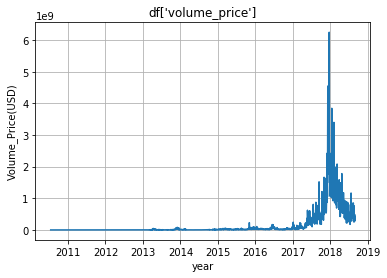


ADF: The data 'volume_price' is NOT STATIONARY 

 t-score                   -2.534981
p-value                    0.107193
# of lags used            29.000000
# of observations       2939.000000
critical value (1%)       -3.432577
critical value (5%)       -2.862524
critical value (10%)      -2.567294
dtype: float64

KPSS: The data 'volume_price' is NOT STATIONARY 

 t-score                   0.844113
p-value                   0.010000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [18]:
# ['volume_price']
series_analysis(df, 'volume_price', xlabel = 'year', ylabel = 'Volume_Price(USD)', title = 'df[\'volume_price\']')


Descriptive Statistics for 'volume_price' 

 count    2968.000000
mean        0.006577
std         0.749558
min       -13.192387
25%        -0.363592
50%        -0.032482
75%         0.358553
max        12.365727
Name: volume_price, dtype: float64


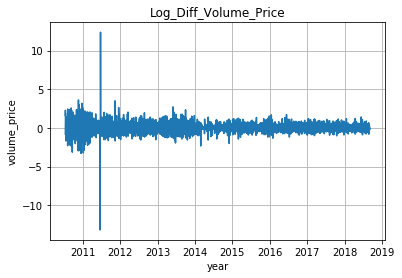


ADF: The data 'volume_price' is STATIONARY 

 t-score                -1.397717e+01
p-value                 4.241200e-26
# of lags used          2.800000e+01
# of observations       2.939000e+03
critical value (1%)    -3.432577e+00
critical value (5%)    -2.862524e+00
critical value (10%)   -2.567294e+00
dtype: float64

KPSS: The data 'volume_price' is STATIONARY 

 t-score                   0.053668
p-value                   0.100000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


,price,volatility,volume_price
date,,,
2010-07-17,0.550310,-0.691985,1.609438
2010-07-18,-0.060508,-0.111975,2.282382
2010-07-19,-0.077962,-0.095023,-0.896088
2010-07-20,0.058087,0.061463,0.741937
2010-07-21,-0.450129,0.457521,1.122143


In [19]:
# ['volume_price'] = log & diff
stationary['volume_price'] =  df['volume_price'].apply(np.log).diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'volume_price',  xlabel = 'year', ylabel = 'volume_price', title = 'Log_Diff_Volume_Price')

stationary.head()

- ## volume_number


Descriptive Statistics for 'volume_number' 

 count      2969.000000
mean      56540.107916
std       55259.140432
min           1.000000
25%       19505.076551
50%       41823.909259
75%       74297.668676
max      572907.818620
Name: volume_number, dtype: float64


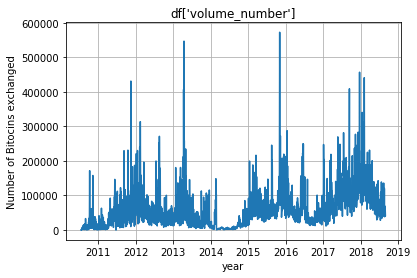


ADF: The data 'volume_number' is STATIONARY 

 t-score                   -4.125472
p-value                    0.000879
# of lags used            27.000000
# of observations       2941.000000
critical value (1%)       -3.432575
critical value (5%)       -2.862523
critical value (10%)      -2.567293
dtype: float64

KPSS: The data 'volume_number' is NOT STATIONARY 

 t-score                   0.449372
p-value                   0.010000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [20]:
# ['volume_number']
series_analysis(df, 'volume_number', xlabel = 'year', ylabel = 'Number of Bitocins exchanged', title = 'df[\'volume_number\']')


Descriptive Statistics for 'volume_number' 

 count      2968.000000
mean         14.045672
std       42092.258606
min     -356062.771140
25%      -13951.065498
50%        -684.245552
75%       12164.821981
max      421763.909910
Name: volume_number, dtype: float64


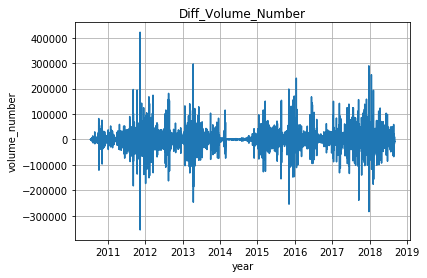


ADF: The data 'volume_number' is STATIONARY 

 t-score                -1.631467e+01
p-value                 3.170860e-29
# of lags used          2.600000e+01
# of observations       2.941000e+03
critical value (1%)    -3.432575e+00
critical value (5%)    -2.862523e+00
critical value (10%)   -2.567293e+00
dtype: float64

KPSS: The data 'volume_number' is STATIONARY 

 t-score                   0.008542
p-value                   0.100000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


,price,volatility,volume_price,volume_number
date,,,,
2010-07-17,0.550310,-0.691985,1.609438,57.247903
2010-07-18,-0.060508,-0.111975,2.282382,548.187740
2010-07-19,-0.077962,-0.095023,-0.896088,-338.841317
2010-07-20,0.058087,0.061463,0.741937,262.641754
2010-07-21,-0.450129,0.457521,1.122143,2024.219364


In [21]:
# ['volume_number'] = diff
stationary['volume_number'] = df['volume_number'].diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'volume_number',  xlabel = 'year', ylabel = 'volume_number', title = 'Diff_Volume_Number')

stationary.head()

- ## positive_comment


Descriptive Statistics for 'positive_comment' 

 count    2969.000000
mean      614.816100
std       737.672425
min         1.000000
25%        48.000000
50%       487.000000
75%       814.000000
max      7745.000000
Name: positive_comment, dtype: float64


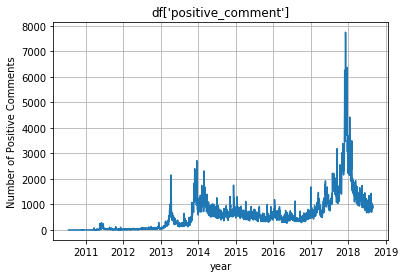


ADF: The data 'positive_comment' is NOT STATIONARY 

 t-score                   -2.840863
p-value                    0.052670
# of lags used            28.000000
# of observations       2940.000000
critical value (1%)       -3.432576
critical value (5%)       -2.862524
critical value (10%)      -2.567294
dtype: float64

KPSS: The data 'positive_comment' is NOT STATIONARY 

 t-score                   0.303234
p-value                   0.010000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [22]:
# ['positive_comment']
series_analysis(df, 'positive_comment', xlabel = 'year', ylabel = 'Number of Positive Comments', title = 'df[\'positive_comment\']')


Descriptive Statistics for 'positive_comment' 

 count    2968.000000
mean        0.002283
std         0.372720
min        -2.484907
25%        -0.143344
50%         0.000000
75%         0.146424
max         4.382027
Name: positive_comment, dtype: float64


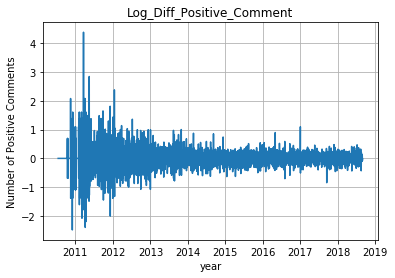


ADF: The data 'positive_comment' is STATIONARY 

 t-score                -1.160532e+01
p-value                 2.589494e-21
# of lags used          2.900000e+01
# of observations       2.938000e+03
critical value (1%)    -3.432578e+00
critical value (5%)    -2.862524e+00
critical value (10%)   -2.567294e+00
dtype: float64

KPSS: The data 'positive_comment' is STATIONARY 

 t-score                   0.018568
p-value                   0.100000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


,price,volatility,volume_price,volume_number,positive_comment
date,,,,,
2010-07-17,0.550310,-0.691985,1.609438,57.247903,0.0
2010-07-18,-0.060508,-0.111975,2.282382,548.187740,0.0
2010-07-19,-0.077962,-0.095023,-0.896088,-338.841317,0.0
2010-07-20,0.058087,0.061463,0.741937,262.641754,0.0
2010-07-21,-0.450129,0.457521,1.122143,2024.219364,0.0


In [23]:
# ['positive_comment'] = log & diff 
stationary['positive_comment'] = df['positive_comment'].apply(np.log).diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'positive_comment', xlabel = 'year', ylabel = 'Number of Positive Comments', title = 'Log_Diff_Positive_Comment')

stationary.head()

- ## neutral_comment


Descriptive Statistics for 'neutral_comment' 

 count    2969.000000
mean      119.354665
std       158.398887
min         1.000000
25%         9.000000
50%        88.000000
75%       147.000000
max      1676.000000
Name: neutral_comment, dtype: float64


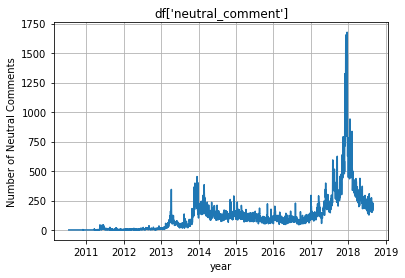


ADF: The data 'neutral_comment' is STATIONARY 

 t-score                   -2.984152
p-value                    0.036401
# of lags used            29.000000
# of observations       2939.000000
critical value (1%)       -3.432577
critical value (5%)       -2.862524
critical value (10%)      -2.567294
dtype: float64

KPSS: The data 'neutral_comment' is NOT STATIONARY 

 t-score                   0.386757
p-value                   0.010000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [24]:
# ['neutral_comment']
series_analysis(df, 'neutral_comment', xlabel = 'year', ylabel = 'Number of Neutral Comments', title = 'df[\'neutral_comment\']')


Descriptive Statistics for 'neutral_comment' 

 count    2968.000000
mean        0.001792
std         0.449143
min        -3.135494
25%        -0.163068
50%         0.000000
75%         0.158856
max         3.784190
Name: neutral_comment, dtype: float64


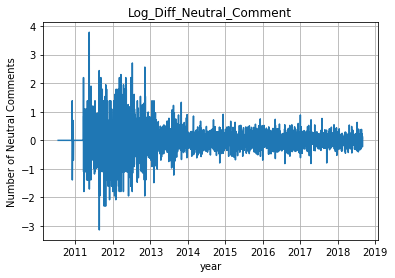


ADF: The data 'neutral_comment' is STATIONARY 

 t-score                -1.364001e+01
p-value                 1.660039e-25
# of lags used          2.600000e+01
# of observations       2.941000e+03
critical value (1%)    -3.432575e+00
critical value (5%)    -2.862523e+00
critical value (10%)   -2.567293e+00
dtype: float64

KPSS: The data 'neutral_comment' is STATIONARY 

 t-score                   0.015243
p-value                   0.100000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


,price,volatility,volume_price,volume_number,positive_comment,neutral_comment
date,,,,,,
2010-07-17,0.550310,-0.691985,1.609438,57.247903,0.0,0.0
2010-07-18,-0.060508,-0.111975,2.282382,548.187740,0.0,0.0
2010-07-19,-0.077962,-0.095023,-0.896088,-338.841317,0.0,0.0
2010-07-20,0.058087,0.061463,0.741937,262.641754,0.0,0.0
2010-07-21,-0.450129,0.457521,1.122143,2024.219364,0.0,0.0


In [25]:
# ['neutral_comment'] = log & diff
stationary['neutral_comment'] = df['neutral_comment'].apply(np.log).diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'neutral_comment', xlabel = 'year', ylabel = 'Number of Neutral Comments', title = 'Log_Diff_Neutral_Comment')

stationary.head()

- ## negative_comment


Descriptive Statistics for 'negative_comment' 

 count    2969.000000
mean      349.636915
std       436.218905
min         1.000000
25%        24.000000
50%       272.000000
75%       448.000000
max      4527.000000
Name: negative_comment, dtype: float64


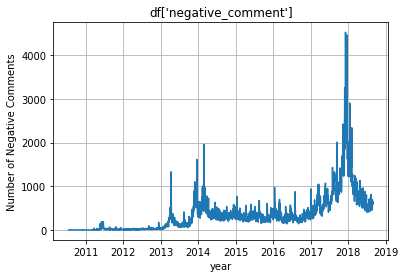


ADF: The data 'negative_comment' is NOT STATIONARY 

 t-score                   -2.773236
p-value                    0.062200
# of lags used            28.000000
# of observations       2940.000000
critical value (1%)       -3.432576
critical value (5%)       -2.862524
critical value (10%)      -2.567294
dtype: float64

KPSS: The data 'negative_comment' is NOT STATIONARY 

 t-score                   0.366032
p-value                   0.010000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [26]:
# ['negative_comment']
series_analysis(df, 'negative_comment', xlabel = 'year', ylabel = 'Number of Negative Comments', title = 'df[\'negative_comment\']')


Descriptive Statistics for 'negative_comment' 

 count    2968.000000
mean        0.002155
std         0.423918
min        -2.197225
25%        -0.166970
50%         0.000000
75%         0.158443
max         3.637586
Name: negative_comment, dtype: float64


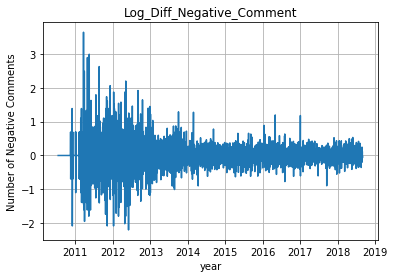


ADF: The data 'negative_comment' is STATIONARY 

 t-score                -1.203248e+01
p-value                 2.852870e-22
# of lags used          2.900000e+01
# of observations       2.938000e+03
critical value (1%)    -3.432578e+00
critical value (5%)    -2.862524e+00
critical value (10%)   -2.567294e+00
dtype: float64

KPSS: The data 'negative_comment' is STATIONARY 

 t-score                   0.014277
p-value                   0.100000
# lags used              29.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


,price,volatility,volume_price,volume_number,positive_comment,neutral_comment,negative_comment
date,,,,,,,
2010-07-17,0.550310,-0.691985,1.609438,57.247903,0.0,0.0,0.0
2010-07-18,-0.060508,-0.111975,2.282382,548.187740,0.0,0.0,0.0
2010-07-19,-0.077962,-0.095023,-0.896088,-338.841317,0.0,0.0,0.0
2010-07-20,0.058087,0.061463,0.741937,262.641754,0.0,0.0,0.0
2010-07-21,-0.450129,0.457521,1.122143,2024.219364,0.0,0.0,0.0


In [27]:
# ['negative_comment'] = log & diff 
stationary['negative_comment'] = df['negative_comment'].apply(np.log).diff().dropna()
# run tests to see if stationary
series_analysis(stationary, 'negative_comment', xlabel = 'year', ylabel = 'Number of Negative Comments', title = 'Log_Diff_Negative_Comment')

stationary.head()

In [28]:
stationary.to_csv('stationary_data_all.csv')